In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [19]:
df =pd.read_csv('./부산여행포토존_유튜브.csv',encoding='utf-8')

In [20]:
df['title'].str[0:]

0      [VLOG]부산 여행 브이로그📸 | 포토존에 미친자의 부산1박2일 | 유유샤브, 더...
1      부산여행 완전정복 !  권역별로 꼭 가봐야하는 부산여행지 23곳 추천, 야경명소, ...
2      부산 뚜벅이 하루 여행코스 Best 8✨부산 가볼만한곳💡국내여행 & 데이트코스 추천...
3      부산여행 브이로그💙흰여울 문화마을 (+포토존)｜여행코스 더보기란 클릭🌈 해운대｜광안...
4                  기장 추천 여행지 / 기장 여행 / 포토존이 가득한 부산 가볼만한곳
                             ...                        
745    ಅಮ್ಮನ ಬರ್ತ್ಡೇ ಗೆ ಕತಾರ್ ದೇಶದಿಂದ ಗಿಫ್ಟ್ ಕಳಿಸಿದರು...
746      ঘৰৰ ফ্ৰীজত ভয়ানক বিস্ফোৰণ ! তিনিজন লোকৰ মৃত্যু
747                부산진구의 역사적 장소를 찾아서! 부산시민공원 360 실감형 콘텐츠
748                   부산 해운대구 방문요양센터 추천! 비지팅엔젤스 해운대지점!!!
749                                부산2호선 양산역 양산행 진입 14편성
Name: title, Length: 750, dtype: object

In [21]:
df['title']= df['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['title']=df["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [22]:
df

,title
0,VLOG 부산 여행 브이로그 포토존에 미친자의 부산1박2일 유유샤브 더베이 해운대...
1,부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
2,부산 뚜벅이 하루 여행코스 Best 8 부산 가볼만한곳 국내여행 데이트코스 추천 해...
3,부산여행 브이로그 흰여울 문화마을 포토존 여행코스 더보기란 클릭 해운대 광안리 청사...
4,기장 추천 여행지 기장 여행 포토존이 가득한 부산 가볼만한곳
...,...
745,ಅಮ ಮನ ಬರ ತ ಡ ಗ ಕತ ರ ದ ಶದ ದ ಗ ಫ ಟ ಕಳ ಸ ದರ ನಮ ಮ ...
746,ঘৰৰ ফ ৰ জত ভয নক ব স ফ ৰণ ত ন জন ল কৰ ম ত য
747,부산진구의 역사적 장소를 찾아서 부산시민공원 360 실감형 콘텐츠
748,부산 해운대구 방문요양센터 추천 비지팅엔젤스 해운대지점


In [23]:
df['title'].to_csv('./부산여행포토존_split.csv',encoding='utf-8',index=False)

In [24]:
df['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,,VLOG,부산,여행,브이로그,포토존에,미친자의,부산1박2일,유유샤브,더베이,...,None,None,None,None,None,None,None,None,None,None
1,부산여행,완전정복,권역별로,꼭,가봐야하는,부산여행지,23곳,추천,야경명소,부산카페,...,None,None,None,None,None,None,None,None,None,None
2,부산,뚜벅이,하루,여행코스,Best,8,부산,가볼만한곳,국내여행,데이트코스,...,None,None,None,None,None,None,None,None,None,None
3,부산여행,브이로그,흰여울,문화마을,포토존,여행코스,더보기란,클릭,해운대,광안리,...,None,None,None,None,None,None,None,None,None,None
4,기장,추천,여행지,기장,여행,포토존이,가득한,부산,가볼만한곳,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,ಅಮ,ಮನ,ಬರ,ತ,ಡ,ಗ,ಕತ,ರ,ದ,ಶದ,...,ವ,ಮ,ಡ,ವ,ಕ,ತ,ಪತ,ಗಳ,,None
746,ঘৰৰ,ফ,ৰ,জত,ভয,নক,ব,স,ফ,ৰণ,...,None,None,None,None,None,None,None,None,None,None
747,부산진구의,역사적,장소를,찾아서,부산시민공원,360,실감형,콘텐츠,None,None,...,None,None,None,None,None,None,None,None,None,None
748,부산,해운대구,방문요양센터,추천,비지팅엔젤스,해운대지점,,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [2]:
# 파일로드
data = pd.read_csv('./부산여행포토존_split.csv',encoding='utf-8')
data = data['title']

In [3]:
data

0       VLOG 부산 여행 브이로그 포토존에 미친자의 부산1박2일 유유샤브 더베이 해운대...
1      부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
2      부산 뚜벅이 하루 여행코스 Best 8 부산 가볼만한곳 국내여행 데이트코스 추천 해...
3      부산여행 브이로그 흰여울 문화마을 포토존 여행코스 더보기란 클릭 해운대 광안리 청사...
4                      기장 추천 여행지 기장 여행 포토존이 가득한 부산 가볼만한곳
                             ...                        
745    ಅಮ ಮನ ಬರ ತ ಡ ಗ ಕತ ರ ದ ಶದ ದ ಗ ಫ ಟ ಕಳ ಸ ದರ ನಮ ಮ ...
746         ঘৰৰ ফ ৰ জত ভয নক ব স ফ ৰণ ত ন জন ল কৰ ম ত য 
747                 부산진구의 역사적 장소를 찾아서 부산시민공원 360 실감형 콘텐츠
748                      부산 해운대구 방문요양센터 추천 비지팅엔젤스 해운대지점 
749                                부산2호선 양산역 양산행 진입 14편성
Name: title, Length: 750, dtype: object

In [4]:
# 데이터가져오기
f = open("./부산여행포토존_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [5]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [6]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [7]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산      674
여행      420
부산여행    332
로그      187
맛집      184
       ... 
스윗        9
전포동       9
베이        9
막창        9
해성        9
Length: 100, dtype: int64


In [8]:
count_data = korean.to_dict()

In [9]:
from collections import Counter


count = Counter(count_data)

In [10]:
count

Counter({'부산': 674,
         '여행': 420,
         '부산여행': 332,
         '로그': 187,
         '맛집': 184,
         '브이': 179,
         '해운대': 139,
         '카페': 138,
         '포토': 137,
         '광안': 126,
         '추천': 111,
         '코스': 111,
         '박일': 94,
         '마을': 93,
         '문화': 78,
         '기장': 71,
         '흰여울': 70,
         '투어': 62,
         '뚜벅': 47,
         '영도': 46,
         '혼자': 46,
         '호텔': 44,
         '캡슐': 37,
         '여행지': 37,
         '바다': 35,
         '숙소': 35,
         '스카이': 33,
         '오션': 31,
         '당일치기': 31,
         '소품': 30,
         '열차': 30,
         '파크': 30,
         '영상': 28,
         '명소': 28,
         '요트': 27,
         '해변': 26,
         '대구': 26,
         '국내': 25,
         '데이트': 25,
         '인생': 24,
         '홀로': 24,
         '친구': 24,
         '먹방': 23,
         '힐링': 23,
         '서면': 23,
         '돼지국밥': 22,
         '경주': 22,
         '야경': 20,
         '필수': 19,
         '롯데': 18,
         '월드': 18,
        

In [11]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

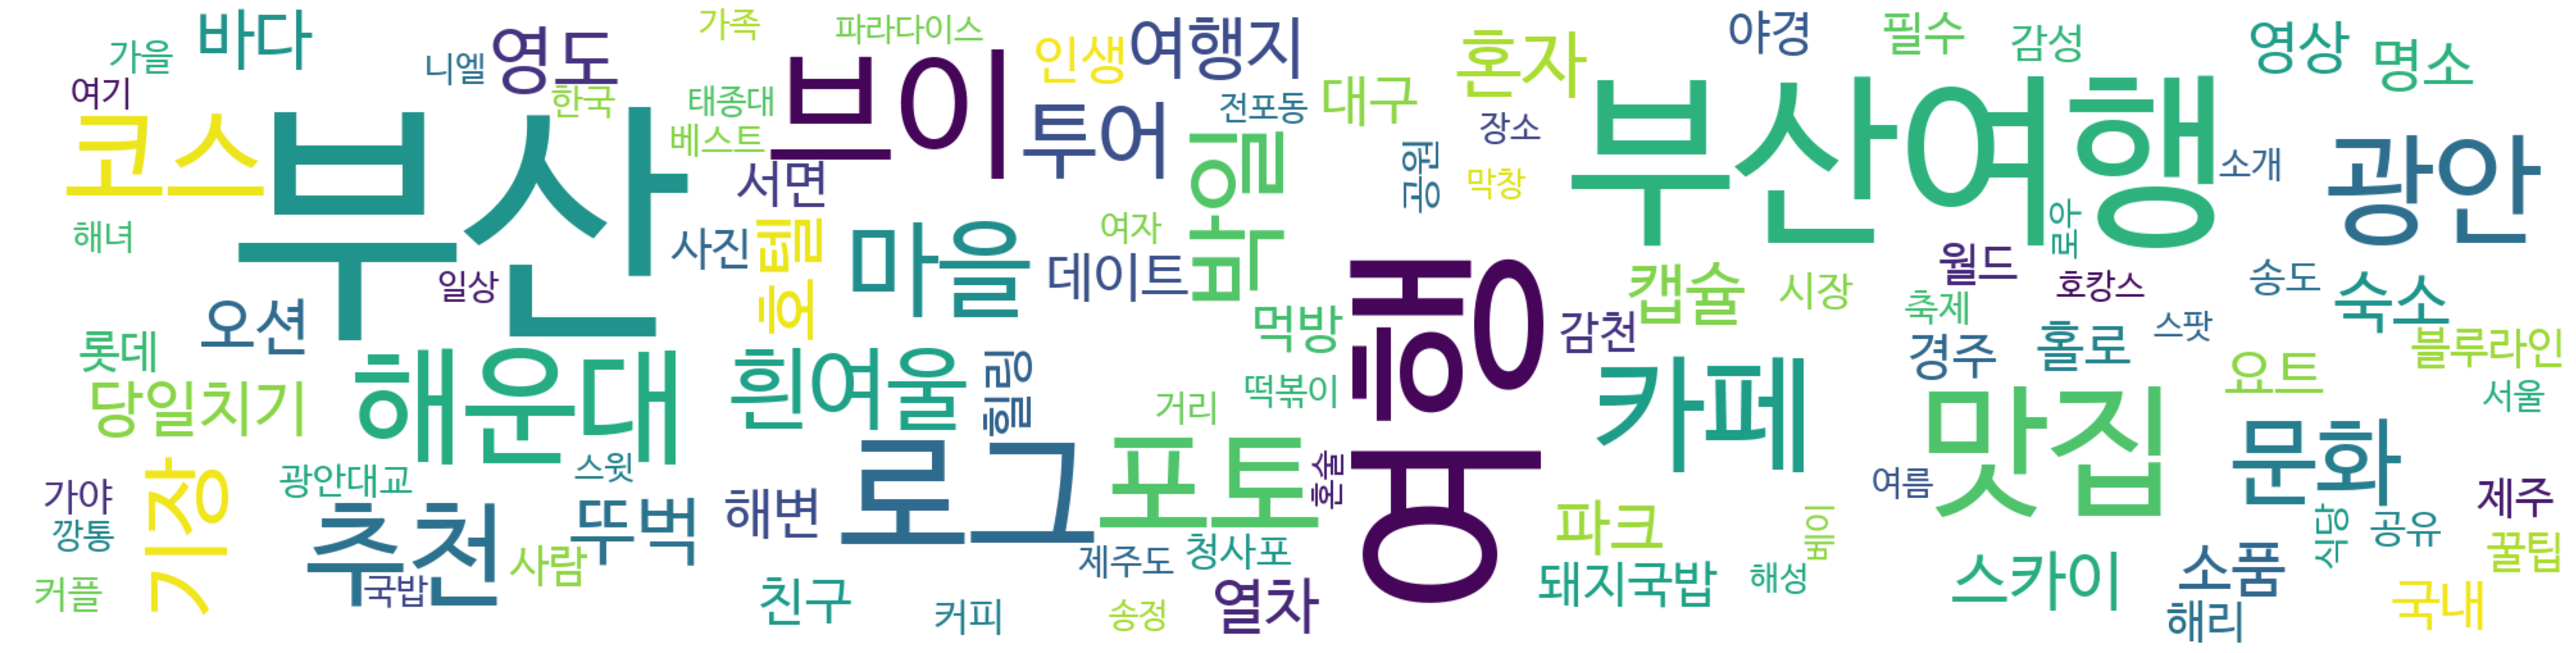

In [12]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [13]:
# 시리즈를 리스트로
data = data.to_list()

In [14]:
# list -> string 
data = ' '.join(data)

In [16]:
data

'22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야 하는 여행지 모음 부산 신상여행지 부터 야경 일몰명소 핫플레이스 까지 부산 주요핫플 총정리 Busan Travel Ι 부산여행   4K 본격 부산여행 가고 싶게 만드는 영상 2박3일  부산 해운대 걸어서 동네한바퀴 상국이네 떡볶이 전통 시장 호랑이젤라떡 해변열차 청사포역 부산국제코미디페스티벌  vlog 1박2일동안 갈 곳 다 가고 먹을 거 다 먹은 3월 부산여행 브이로그  부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마다 무조건 가는 이색적인 곳들 카카오맵 여행지도 공유  부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 부산포토존 부산숙소추천 여행지 가는법과 꿀팁 Busan Travel ENG 부산여행 1박 2일로 갔다가 2 5kg 찐 썰 푼다 부산 맛집 핫플 뿌시기 본전돼지국밥 흰여울마을 1인사무소 해성막창 춘하추동밀면 브라켓테이블 네살차이 스스키노  해외반응 부산 여행을 고민한다고 말하자 부산은 완전 미친 도시야 라며 나온 외국인들의 리얼 반응 한국에 가려면 부산은 꼭 가봐  부산여행가서 시집잔소리 잔뜩 듣고 왔어요 부산꼼장어 뷰맛집 료미 송정점 Busan mukbang Vlog hagfish Somak realeatingshow  ENG 채정안의 부산스러운 부산 여행V log 1편 ㅣ왓츠 인 마이 캐리어ㅣ부산 아난티 뚜벅이들의 2박3일 부산여행 핫플 다 담아왔으니 커몬 요트투어 캡슐열차 소품샵 브런치  부산 뚜벅이 하루 여행코스 Best 8 부산 가볼만한곳 국내여행 데이트코스 추천 해동용궁사 루지 블루라인파크 해운대해수욕장 요트투어 더베이101  16년지기와 부산에서 힐링여행 호텔1 흰여울문화마을 캡슐열차 광안리 소품샵투어 해동용궁사 장씨해녀집 깡통시장 부산여행 vlog 24시간동안 서울 여행 VS 부산 여행 어디가 더 재밌을까 ㅣ파뿌리 부산 맛집 직이네 또간집 EP 9 후쿠오카vlog ㅣ일본 무비자입

In [45]:
# 문장 -> 단어 -> 키워드
n_data = Kkma().nouns(data) # 명사만

In [46]:
n_data

['22',
 '22년',
 '년',
 '23',
 '23년',
 '부산',
 '부산여행',
 '여행',
 '방법',
 '이',
 '영상',
 '하나',
 '해결',
 '여행지',
 '모음',
 '신상',
 '신상여행지',
 '터',
 '야경',
 '일몰',
 '일몰명소',
 '명소',
 '핫',
 '핫플레이스',
 '플레이스',
 '주요',
 '주요핫플',
 '플',
 '총',
 '총정리',
 '정리',
 '4',
 '본격',
 '2',
 '2박3일',
 '박',
 '3',
 '일',
 '해운대',
 '동네',
 '바퀴',
 '상국',
 '떡볶이',
 '전통',
 '시장',
 '호랑',
 '젤',
 '젤라떡',
 '라',
 '떡',
 '해변',
 '해변열차',
 '열차',
 '청사',
 '청사포역',
 '포',
 '역',
 '부산국제코미디페스티벌',
 '국제',
 '코미디',
 '페스티벌',
 '1',
 '1박2일',
 '동안',
 '곳',
 '거',
 '3월',
 '월',
 '브이',
 '브이로그',
 '로그',
 '필수',
 '필수코스',
 '코스',
 '18',
 '18곳',
 '부산시민',
 '시민',
 '관광객',
 '스팟',
 '때',
 '이색적',
 '카카오',
 '여행지도',
 '공유',
 '완전',
 '완전정복',
 '정복',
 '권역',
 '부산여행지',
 '23곳',
 '추천',
 '야경명소',
 '부산카페',
 '카페',
 '부산포토존',
 '포토',
 '존',
 '부산숙소추천',
 '숙소',
 '법과',
 '팁',
 '1박',
 '2일',
 '5',
 '맛',
 '맛집',
 '집',
 '핫플',
 '본전',
 '본전돼지국밥',
 '돼지',
 '국밥',
 '여울',
 '여울마을',
 '마을',
 '1인사무소',
 '인',
 '사무소',
 '해성',
 '해성막창',
 '막창',
 '춘하',
 '춘하추동',
 '추동',
 '브라켓',
 '브라켓테이블',
 '테이블',
 '살',
 '살차이',
 '차이',
 '스스',
 '스스키노',
 '키'

In [56]:
s_data = Kkma().sentences(data) # 문장만 추출

In [19]:
from collections import Counter


count_n_data = Counter(n_data)

In [20]:
count_n_data

Counter({'22': 1,
         '22년': 1,
         '년': 1,
         '23': 1,
         '23년': 1,
         '부산': 1,
         '부산여행': 2,
         '여행': 1,
         '방법': 1,
         '이': 2,
         '영상': 1,
         '하나': 2,
         '해결': 1,
         '여행지': 1,
         '모음': 1,
         '신상': 1,
         '신상여행지': 1,
         '터': 2,
         '야경': 1,
         '일몰': 1,
         '일몰명소': 1,
         '명소': 1,
         '핫': 1,
         '핫플레이스': 1,
         '플레이스': 1,
         '주요': 1,
         '주요핫플': 1,
         '플': 1,
         '총': 1,
         '총정리': 1,
         '정리': 1,
         '4': 1,
         '본격': 1,
         '2': 1,
         '2박3일': 1,
         '박': 2,
         '3': 1,
         '일': 3,
         '해운대': 1,
         '동네': 1,
         '바퀴': 2,
         '상국': 1,
         '떡볶이': 1,
         '전통': 1,
         '시장': 1,
         '호랑': 1,
         '젤': 1,
         '젤라떡': 1,
         '라': 1,
         '떡': 1,
         '해변': 1,
         '해변열차': 1,
         '열차': 1,
         '청사': 1,
         '청사포역': 

In [47]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

In [48]:
wordcloud = WordCloud(font_path=font_path)

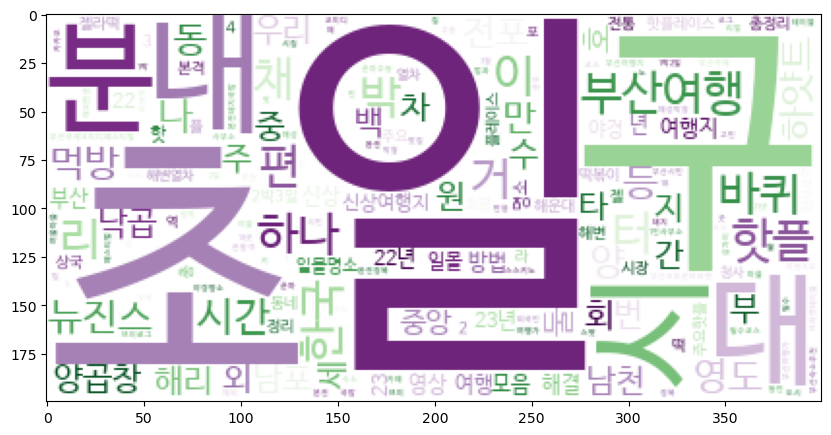

In [49]:
wordcloud = WordCloud(
    font_path = font_path, # 한글 글씨체 설정
    background_color='white', # 배경색은 흰색으로 
    colormap='PRGn', # 글씨색
    random_state=42, # 출력할때마다 같은결과 나오게
).generate_from_frequencies(dict(count_n_data))

#사이즈
plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
